In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('jaipur_data.csv') 

In [3]:
df.head(3)

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,157.0,January - M011990,Rajasthan,Jaipur,NaN,"Residential, Rural and other Areas",5.0,30.8,NaN,265.0,NaN,NaN,01-01-1990
1,156.0,January - M011990,Rajasthan,Jaipur,NaN,"Residential, Rural and other Areas",7.4,41.4,NaN,403.0,NaN,NaN,01-01-1990
2,158.0,February - M021990,Rajasthan,Jaipur,NaN,Industrial Area,5.0,16.6,NaN,114.0,NaN,NaN,01-02-1990


In [4]:
df.tail(3) 

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
2129,408.0,08-06-2013,Rajasthan,Jaipur,Rajasthan State Pollution Control Board,"Residential, Rural and other Areas",5.0,28.900000,49.000000,NaN,"Office of District Education Officer, Chandpol...",NaN,08-06-2013
2130,408.0,08-09-2013,Rajasthan,Jaipur,Rajasthan State Pollution Control Board,"Residential, Rural and other Areas",5.0,27.133333,35.666667,NaN,"Office of District Education Officer, Chandpol...",NaN,08-09-2013
2131,408.0,16-08-2013,Rajasthan,Jaipur,Rajasthan State Pollution Control Board,"Residential, Rural and other Areas",5.0,24.233333,63.666667,NaN,"Office of District Education Officer, Chandpol...",NaN,16-08-2013


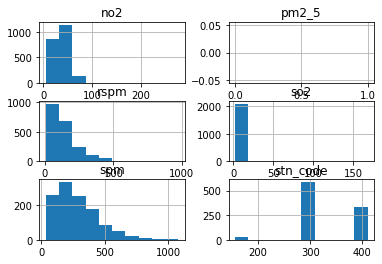

In [5]:
df.hist()
plt.show()

## Descriptive Statistics

In [6]:
df.columns

Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date'],
      dtype='object')

In [7]:
df.describe()

,stn_code,so2,no2,rspm,spm,pm2_5
count,947.000000,2116.000000,2120.000000,2099.000000,1198.000000,0.0
mean,331.225977,6.801890,36.482747,144.906006,286.351419,NaN
std,62.043390,6.130234,16.697183,111.314709,176.077888,NaN
min,156.000000,2.300000,5.600000,10.000000,37.000000,NaN
25%,297.000000,4.300000,22.000000,72.000000,154.000000,NaN
50%,298.000000,5.500000,37.383333,115.000000,247.000000,NaN
75%,408.000000,8.000000,49.000000,184.000000,380.750000,NaN
max,410.000000,168.000000,277.000000,975.000000,1078.000000,NaN


## Data Visualization

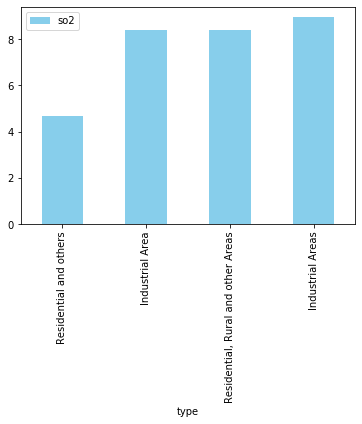

In [8]:
df[['so2','type']].groupby(["type"]).mean().sort_values(by='so2').head(20).plot.bar(color='skyblue')
plt.show()

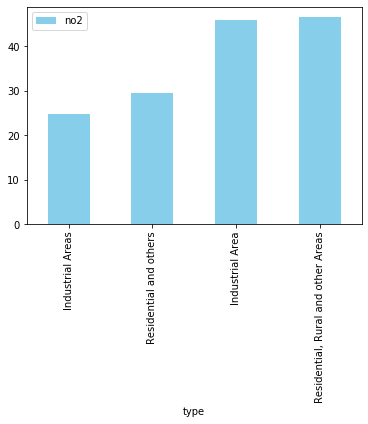

In [9]:
df[['no2','type']].groupby(["type"]).mean().sort_values(by='no2').head(20).plot.bar(color='skyblue')
plt.show()

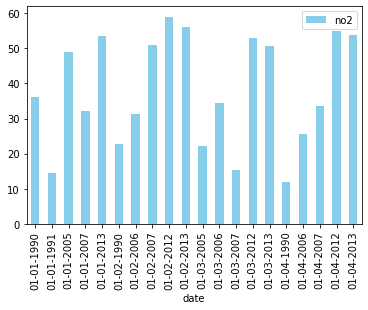

In [10]:
df[['no2','date']].groupby(["date"]).mean().sort_values(by='date').head(20).plot.bar(color='skyblue')
plt.show()

## EDA

In [11]:
df.drop(['stn_code','agency','sampling_date','location_monitoring_station'],axis=1,inplace=True)

In [12]:
total = df.isnull().sum().sort_values(ascending=False)
total.head(5)

pm2_5    2132
spm       934
rspm       33
so2        16
no2        12
dtype: int64

In [13]:
def impute(series):
    return series.fillna(series.mean())
df['rspm']=df.groupby('state')['rspm'].transform(impute)  
df['so2']=df.groupby('state')['so2'].transform(impute)
df['no2']=df.groupby('state')['no2'].transform(impute)
df['spm']=df.groupby('state')['spm'].transform(impute)
df['pm2_5']=df.groupby('state')['pm2_5'].transform(impute)

In [14]:
df.isnull().sum()

state          0
location       0
type           0
so2            0
no2            0
rspm           0
spm            0
pm2_5       2132
date           0
dtype: int64

In [15]:
#I={\frac {I_{high}-I_{low}}{C_{high}-C_{low}}}(C-C_{low})+I_{low}
#This equation is used to convert concentration into AQI

In [16]:
def cal_SOi(so2):
    si=0
    if (so2<=40):
        si= so2*(50/40)
    elif (so2>40 and so2<=80):
        si= 50+(so2-40)*(50/40)
    elif (so2>80 and so2<=380):
        si= 100+(so2-80)*(100/300)
    elif (so2>380 and so2<=800):
        si= 200+(so2-380)*(100/420)
    elif (so2>800 and so2<=1600):
        si= 300+(so2-800)*(100/800)
    elif (so2>1600):
        si= 400+(so2-1600)*(100/800)
    return si
df['SOi']=df['so2'].apply(cal_SOi)
df1= df[['so2','SOi']]
df1.head()
def cal_Noi(no2):
    ni=0
    if(no2<=40):
        ni= no2*50/40
    elif(no2>40 and no2<=80):
        ni= 50+(no2-40)*(50/40)
    elif(no2>80 and no2<=180):
        ni= 100+(no2-80)*(100/100)
    elif(no2>180 and no2<=280):
        ni= 200+(no2-180)*(100/100)
    elif(no2>280 and no2<=400):
        ni= 300+(no2-280)*(100/120)
    else:
        ni= 400+(no2-400)*(100/120)
    return ni
df['Noi']=df['no2'].apply(cal_Noi)
df1= df[['no2','Noi']]
df1.head()
def cal_RSPMi(rspm):
    rpi=0
    if(rspm<=100):
        rpi = rspm
    elif(rspm>=101 and rspm<=150):
         rpi= 101+(rspm-101)*((200-101)/(150-101))
    elif(rspm>=151 and rspm<=350):
         ni= 201+(rspm-151)*((300-201)/(350-151))
    elif(rspm>=351 and rspm<=420):
        ni= 301+(rspm-351)*((400-301)/(420-351))
    elif(rspm>420):
        ni= 401+(rspm-420)*((500-401)/(420-351))
    return rpi
df['RSPMi']=df['rspm'].apply(cal_RSPMi)
df1= df[['rspm','RSPMi']]
df1.head()
def cal_SPMi(spm):
    spi=0
    if(spm<=50):
        spi=spm*50/50
    elif(spm>50 and spm<=100):
        spi=50+(spm-50)*(50/50)
    elif(spm>100 and spm<=250):
        spi= 100+(spm-100)*(100/150)
    elif(spm>250 and spm<=350):
        spi=200+(spm-250)*(100/100)
    elif(spm>350 and spm<=430):
        spi=300+(spm-350)*(100/80)
    else:
        spi=400+(spm-430)*(100/430)
    return spi
   
df['SPMi']=df['spm'].apply(cal_SPMi)
df1= df[['spm','SPMi']]
df1.head()
def cal_pmi(pm2_5):
    pmi=0
    if(pm2_5<=50):
        pmi=pm2_5*(50/50)
    elif(pm2_5>50 and pm2_5<=100):
         pmi=50+(pm2_5-50)*(50/50)
    elif(pm2_5>100 and pm2_5<=250):
        pmi= 100+(pm2_5-100)*(100/150)
    elif(pm2_5>250 and pm2_5<=350):
        pmi=200+(pm2_5-250)*(100/100)
    elif(pm2_5>350 and pm2_5<=450):
        pmi=300+(pm2_5-350)*(100/100)
    else:
        pmi=400+(pm2_5-430)*(100/80)
    return pmi
df['PMi']=df['pm2_5'].apply(cal_pmi)
df1= df[['pm2_5','PMi']]
df1.head()
def cal_aqi(si,ni,rspmi,spmi):
    aqi=0
    if(si>ni and si>rspmi and si>spmi):
        aqi=si
    if(ni>si and ni>rspmi and ni>spmi ):
        aqi=ni
    if(rspmi>si and rspmi>ni and rspmi>spmi ):
        aqi=rspmi
    if(spmi>si and spmi>ni and spmi>rspmi):
        aqi=spmi
    return aqi

df['AQI']=df.apply(lambda x:cal_aqi(x['SOi'],x['Noi'],x['RSPMi'],x['SPMi']),axis=1)
df1= df[['state','SOi','Noi','RSPMi','SPMi','AQI']]
df1.head()
def AQI_Range(x):
    if x<101:
        return "Good"
    elif x>101 and x<=201:
        return "Moderate"
    elif x>201 and x<=1000:
        return "Poor"
df['AQI_Range'] = df['AQI'] .apply(AQI_Range)
df.head()


,state,location,type,so2,no2,rspm,spm,pm2_5,date,SOi,Noi,RSPMi,SPMi,PMi,AQI,AQI_Range
0,Rajasthan,Jaipur,"Residential, Rural and other Areas",5.0,30.8,144.906006,265.0,NaN,01-01-1990,6.250,38.50,189.708053,215.000000,NaN,215.000000,Poor
1,Rajasthan,Jaipur,"Residential, Rural and other Areas",7.4,41.4,144.906006,403.0,NaN,01-01-1990,9.250,51.75,189.708053,366.250000,NaN,366.250000,Poor
2,Rajasthan,Jaipur,Industrial Area,5.0,16.6,144.906006,114.0,NaN,01-02-1990,6.250,20.75,189.708053,109.333333,NaN,189.708053,Moderate
3,Rajasthan,Jaipur,"Residential, Rural and other Areas",5.0,13.4,144.906006,276.0,NaN,01-02-1990,6.250,16.75,189.708053,226.000000,NaN,226.000000,Poor
4,Rajasthan,Jaipur,"Residential, Rural and other Areas",6.9,38.2,144.906006,313.0,NaN,01-02-1990,8.625,47.75,189.708053,263.000000,NaN,263.000000,Poor


In [17]:
df['AQI_Range']=df['AQI_Range'].astype(str)

##  LabelEncoding

In [18]:
from sklearn.preprocessing import LabelEncoder
s=LabelEncoder()
enc=s.fit_transform(df['AQI_Range'])
df2=pd.DataFrame(data=enc)
df3=pd.concat([df,df2],axis=1)
df3
df3.rename(columns={0: 'AQI_LABEL'}, inplace=True)
df3.head(3)
df3.tail(50)

,state,location,type,so2,no2,rspm,spm,pm2_5,date,SOi,Noi,RSPMi,SPMi,PMi,AQI,AQI_Range,AQI_LABEL
2082,Rajasthan,Jaipur,"Residential, Rural and other Areas",10.0,52.033333,201.333333,286.351419,NaN,25-01-2013,12.50,65.041667,0.000000,236.351419,NaN,236.351419,Poor,2
2083,Rajasthan,Jaipur,"Residential, Rural and other Areas",10.0,52.616667,136.000000,286.351419,NaN,29-01-2013,12.50,65.770833,171.714286,236.351419,NaN,236.351419,Poor,2
2084,Rajasthan,Jaipur,"Residential, Rural and other Areas",10.0,54.283333,150.666667,286.351419,NaN,02-01-2013,12.50,67.854167,0.000000,236.351419,NaN,236.351419,Poor,2
2085,Rajasthan,Jaipur,"Residential, Rural and other Areas",9.0,49.733333,124.000000,286.351419,NaN,02-05-2013,11.25,62.166667,147.469388,236.351419,NaN,236.351419,Poor,2
2086,Rajasthan,Jaipur,"Residential, Rural and other Areas",10.0,53.816667,91.666667,286.351419,NaN,02-08-2013,12.50,67.270833,91.666667,236.351419,NaN,236.351419,Poor,2
2087,Rajasthan,Jaipur,"Residential, Rural and other Areas",11.0,54.566667,117.000000,286.351419,NaN,02-12-2013,13.75,68.208333,133.326531,236.351419,NaN,236.351419,Poor,2
2088,Rajasthan,Jaipur,"Residential, Rural and other Areas",9.0,49.250000,69.333333,286.351419,NaN,15-02-2013,11.25,61.562500,69.333333,236.351419,NaN,236.351419,Poor,2
2089,Rajasthan,Jaipur,"Residential, Rural and other Areas",9.0,49.733333,133.000000,286.351419,NaN,19-02-2013,11.25,62.166667,165.653061,236.351419,NaN,236.351419,Poor,2
2090,Rajasthan,Jaipur,"Residential, Rural and other Areas",8.0,50.050000,245.000000,286.351419,NaN,22-02-2013,10.00,62.562500,0.000000,236.351419,NaN,236.351419,Poor,2
2091,Rajasthan,Jaipur,"Residential, Rural and other Areas",7.0,35.766667,92.333333,286.351419,NaN,26-02-2013,8.75,44.708333,92.333333,236.351419,NaN,236.351419,Poor,2


<function matplotlib.pyplot.show(*args, **kw)>

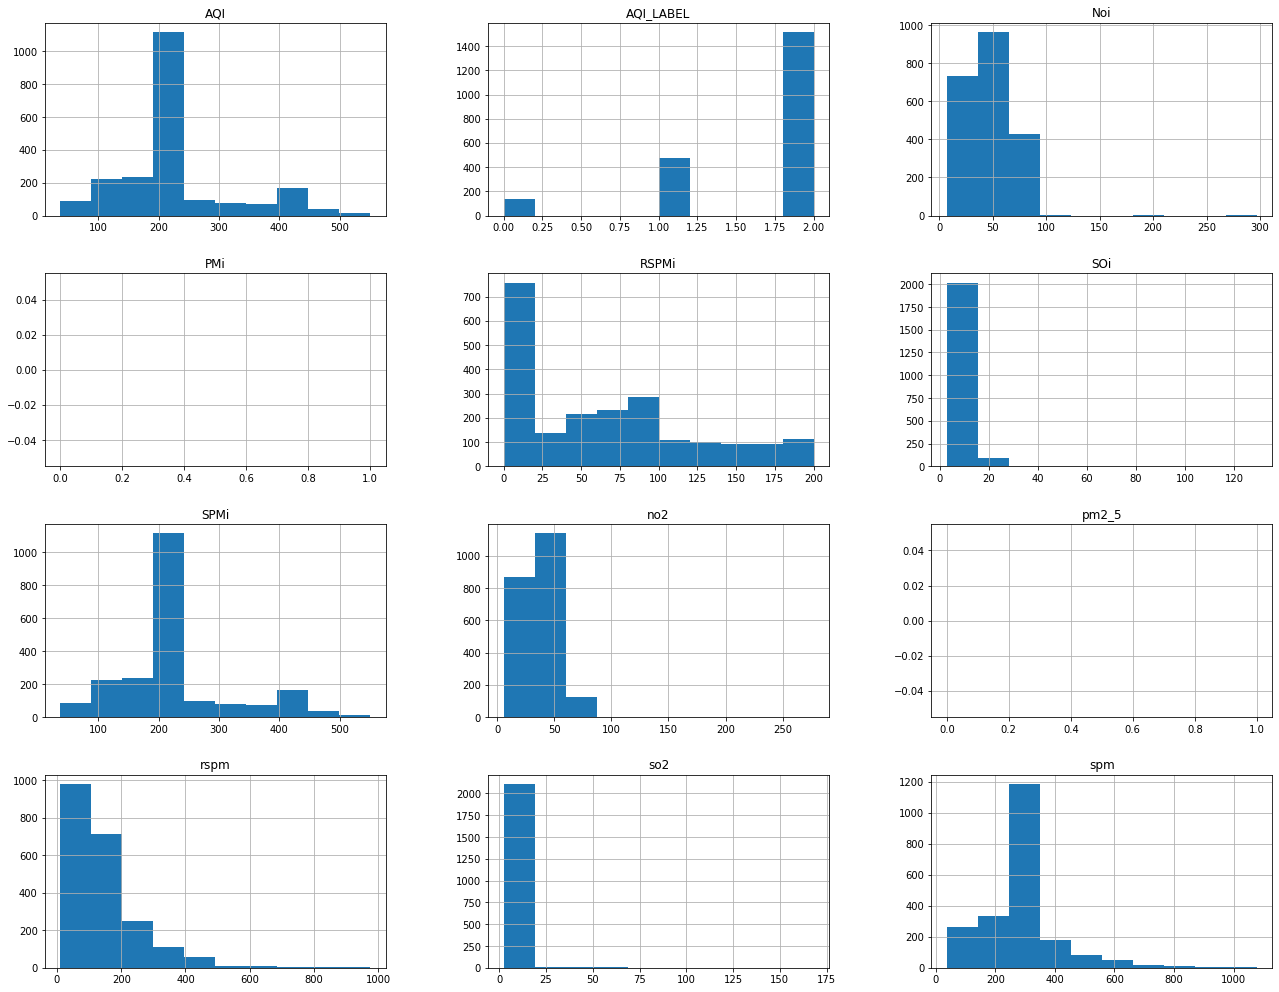

In [19]:
df3.hist(layout=(5,3),figsize=(22,22))
plt.show

In [20]:
df5=df3.drop(["PMi","pm2_5"],axis=1)
#df.drop(['A'], axis = 1) 

<function matplotlib.pyplot.show(*args, **kw)>

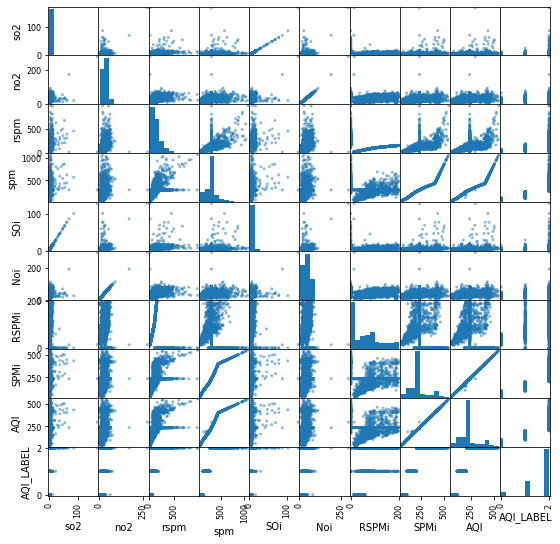

In [21]:
scatter_matrix(df5,figsize=(9,9))
plt.show

##  Applying Diffrent Models

## Logistic Regression Model 1

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X1 = df3[["SOi","Noi","RSPMi","SPMi"]]
Y1 = df3['AQI_LABEL']


In [23]:
x_train, x_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.3, random_state=10)

In [24]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
pred=model.predict(x_test)

In [26]:
model.score(x_test,y_test) 

0.921875

In [27]:
from sklearn.metrics import confusion_matrix 
con_mat=confusion_matrix(y_test,pred)
print(con_mat)

[[  6  37   0]
 [  4 148   5]
 [  0   4 436]]


In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.60      0.14      0.23        43
           1       0.78      0.94      0.86       157
           2       0.99      0.99      0.99       440

    accuracy                           0.92       640
   macro avg       0.79      0.69      0.69       640
weighted avg       0.91      0.92      0.91       640



## Logistic Regression Model 2 with balance Class Using SMOTE

In [29]:
from imblearn.over_sampling import SMOTE
a = df3[["SOi","Noi","RSPMi","SPMi"]]
b = df3['AQI_LABEL']

In [30]:
x_train0, x_test0, y_train0, y_test0 = train_test_split(a, b, test_size=0.3, random_state=10)

In [31]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
x_train0 = sc_X.fit_transform(x_train0)
x_test0 = sc_X.transform(x_test0)

In [32]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
x_train0, y_train0 = smt.fit_sample(x_train0, y_train0)

In [33]:
model2 = LogisticRegression()
model2.fit(x_train0,y_train0)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
np.bincount(y_train0)
y_pred0=model2.predict(x_test0)

In [35]:
model2.score(x_test0,y_test0) 

0.9734375

In [36]:
confusion_matrix(y_test0, y_pred0)

array([[ 43,   0,   0],
       [ 10, 146,   1],
       [  0,   6, 434]], dtype=int64)

In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test0, y_pred0))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90        43
           1       0.96      0.93      0.94       157
           2       1.00      0.99      0.99       440

    accuracy                           0.97       640
   macro avg       0.92      0.97      0.94       640
weighted avg       0.98      0.97      0.97       640



## KNeighborsClassifier

In [38]:
X2 = df3[["SOi","Noi","RSPMi","SPMi"]]
Y2 = df3['AQI_LABEL']

In [39]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(X2, Y2, test_size=0.3, random_state=10)

In [40]:
## StandardScaling

In [41]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
x_train2 = sc_X.fit_transform(x_train1)
x_test2 = sc_X.transform(x_test1)

In [42]:
from sklearn.neighbors import KNeighborsClassifier
model3 = KNeighborsClassifier(n_neighbors=6, weights='uniform')
model3.fit(x_train2, y_train1)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [43]:
y_predict = model3.predict(x_test2)

In [44]:
accuracy_score(y_test1,y_predict)

0.9796875

In [45]:
confusion_matrix(y_test1, y_predict)

array([[ 43,   0,   0],
       [  4, 148,   5],
       [  0,   4, 436]], dtype=int64)

In [46]:
print(classification_report(y_test1,y_predict))

              precision    recall  f1-score   support

           0       0.91      1.00      0.96        43
           1       0.97      0.94      0.96       157
           2       0.99      0.99      0.99       440

    accuracy                           0.98       640
   macro avg       0.96      0.98      0.97       640
weighted avg       0.98      0.98      0.98       640



## Support Vector Classifier

In [47]:
X3 = df3[["SPMi","SOi","Noi","RSPMi"]]
Y3 = df3['AQI_LABEL']

In [48]:
x_train3, x_test3, y_train3, y_test3 = train_test_split(X3, Y3, test_size=0.3, random_state=10)

In [49]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
x_train4 = sc_X.fit_transform(x_train3)
x_test4 = sc_X.transform(x_test3)

In [50]:
from sklearn.svm import SVC

In [51]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 30)
classifier.fit(x_train4, y_train3)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=30, shrinking=True, tol=0.001,
    verbose=False)

In [52]:
Y_Pred = classifier.predict(x_test4)

In [53]:
accuracy_score(y_test3,Y_Pred)

0.9890625

In [54]:
cm = confusion_matrix(y_test3, Y_Pred)
cm

array([[ 41,   2,   0],
       [  2, 155,   0],
       [  0,   3, 437]], dtype=int64)

In [55]:
print(classification_report(y_test3,Y_Pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        43
           1       0.97      0.99      0.98       157
           2       1.00      0.99      1.00       440

    accuracy                           0.99       640
   macro avg       0.97      0.98      0.98       640
weighted avg       0.99      0.99      0.99       640

